### Date 05/09/22

### By Endework Abera

In [1]:
#importing libriaries 

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv(r'C:\Users\ende\Downloads\Week1_challenge_data_source(CSV).csv', na_values=['?', None])
db.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [4]:
### cleaning 

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns



def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]



In [5]:
 missing_values_table(db)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [6]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The dataset contains 12.5 % missing values.


In [7]:
# drop columns with more than 30% missing values
df_clean=db.dropna()
df_clean.shape

(17558, 55)

In [8]:
# drop columns with more than 30% missing values
#df_clean = db.drop(['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name','Avg RTT DL (ms)','Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','DL TP < 50 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','HTTP DL (Bytes)','HTTP UL (Bytes)','Handset Manufacturer','Handset Type','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'], axis=1)
#df_clean.shape

In [9]:
percent_missing(df_clean)

The dataset contains 0.0 % missing values.


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17558 entries, 11 to 149990
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 17558 non-null  float64
 1   Start                                     17558 non-null  object 
 2   Start ms                                  17558 non-null  float64
 3   End                                       17558 non-null  object 
 4   End ms                                    17558 non-null  float64
 5   Dur. (ms)                                 17558 non-null  float64
 6   IMSI                                      17558 non-null  float64
 7   MSISDN/Number                             17558 non-null  float64
 8   IMEI                                      17558 non-null  float64
 9   Last Location Name                        17558 non-null  object 
 10  Avg RTT DL (ms)                 

### Converting to the appropriate data types

In [11]:
#df1=df_clean[['Bearer Id','IMSI','IMEI','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']]

In [12]:
#df2=df_clean[['Start','Start ms','End','End ms','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)']]

In [13]:
df_clean[['Bearer Id','IMSI','MSISDN/Number','IMEI','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']]=df_clean[['Bearer Id','IMSI','IMEI','MSISDN/Number','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']].astype('int64')

In [14]:
df_clean[['Start','Start ms','End','End ms','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)']]=df_clean[['Start','Start ms','End','End ms','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)']].astype('datetime64[ns]')

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17558 entries, 11 to 149990
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Bearer Id                                 17558 non-null  int64         
 1   Start                                     17558 non-null  datetime64[ns]
 2   Start ms                                  17558 non-null  datetime64[ns]
 3   End                                       17558 non-null  datetime64[ns]
 4   End ms                                    17558 non-null  datetime64[ns]
 5   Dur. (ms)                                 17558 non-null  datetime64[ns]
 6   IMSI                                      17558 non-null  int64         
 7   MSISDN/Number                             17558 non-null  int64         
 8   IMEI                                      17558 non-null  int64         
 9   Last Location Name        

In [16]:
df_clean.describe()

,Bearer Id,IMSI,MSISDN/Number,IMEI,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,17558.000000,17558.000000,1.755800e+04,1.755800e+04,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,1.755800e+04,17558.000000,1.755800e+04,1.755800e+04,1.755800e+04,17558.000000,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04
mean,-2.349924e+18,2.082016e+14,6.657457e+13,3.368054e+10,48858.641531,11080.232999,4.126898e+07,1.916497e+06,77.615959,8.439856,5.691651,6.257376,94.184645,2.909329,0.857900,0.574838,2.744579e+08,8.053744e+06,8.743356e+06,6.876325e+06,8.213013e+07,1779.737556,701.265634,1457.492482,165.477902,1753.322246,258.256464,15215.804477,17026.628716,1.792496e+06,32995.564358,5.749420e+06,2.057369e+06,1.787349e+06,468142.132931,1.171990e+07,1.104661e+07,1.168226e+07,1.107134e+07,4.218381e+08,8.317698e+06,4.247357e+08,8.223797e+06,4.121795e+07,4.545695e+08
std,8.131050e+18,1.018220e+09,2.480766e+13,4.378255e+07,29866.061423,8199.284662,2.616483e+08,4.598129e+07,14.699359,6.652584,5.809749,7.869456,8.896298,5.260691,3.764743,3.425869,1.381899e+09,3.252010e+07,1.107900e+07,9.479099e+06,4.505748e+07,3375.238924,2057.698950,2387.373023,1290.585550,2268.294101,1390.823580,13444.477109,15450.776656,1.033271e+06,19099.520303,3.303525e+06,1.193235e+06,1.040625e+06,271330.781950,6.738608e+06,6.351623e+06,6.708762e+06,6.318829e+06,2.455078e+08,4.795778e+06,2.415153e+08,4.763249e+06,1.125153e+07,2.456590e+08
min,-9.223372e+18,2.082001e+14,1.341200e+12,3.360101e+10,5242.000000,3146.000000,3.500000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000e+01,1.040000e+02,2.767000e+04,3.518600e+04,8.125275e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,81.000000,4.840000e+02,1.000000,1.324000e+03,3.250000e+02,1.400000e+02,49.000000,1.156000e+03,2.970000e+02,9.640000e+02,2.430000e+02,6.859400e+04,7.900000e+01,5.995600e+04,2.150000e+02,4.661082e+06,7.114041e+06
25%,-9.223372e+18,2.082014e+14,3.572871e+13,3.365918e+10,28389.500000,4899.000000,6.485970e+05,1.546050e+04,70.000000,4.000000,2.000000,1.000000,94.000000,1.000000,0.000000,0.000000,4.196658e+06,4.190042e+05,1.766472e+06,1.530646e+06,7.420716e+07,142.000000,86.000000,198.000000,3.000000,409.000000,8.000000,5164.500000,5387.250000,8.967062e+05,16491.250000,2.863753e+06,1.023456e+06,8.772650e+05,231952.500000,5.867095e+06,5.526318e+06,5.866831e+06,5.612121e+06,2.073835e+08,4.134870e+06,2.175323e+08,4.145057e+06,3.325642e+07,2.398442e+08
50%,-9.223372e+18,2.082017e+14,8.637690e+13,3.366469e+10,42733.500000,8283.000000,2.804230e+06,5.466400e+04,80.000000,7.000000,4.000000,4.000000,97.000000,1.000000,0.000000,0.000000,3.336022e+07,1.787009e+06,4.531557e+06,3.483856

### Cleaning inconsistent labels column

In [17]:
df_clean['Handset_Type']=df_clean['Handset Type']

In [18]:
df_clean['Handset_Manufacturer']=df_clean['Handset Manufacturer']

In [19]:
#top 10 handsets

In [20]:
df_clean['Handset_Type'].value_counts()

Huawei B528S-23A                                  8839
Huawei E5180                                       797
Apple iPhone 7 (A1778)                             523
Apple iPhone Xr (A2105)                            513
Apple iPhone 6S (A1688)                            507
                                                  ... 
Apple iPad Mini 4 (A1550)                            1
Netgear Inc Nighthawk Ac1900 Cat 6 Lte Gateway       1
Apple iPhone 6S Plus (A1699)                         1
Samsung Galaxy J1 (Sm-J120X)                         1
New-Bund Technol. Thor                               1
Name: Handset_Type, Length: 347, dtype: int64

In [21]:
df_clean['Handset_Manufacturer'].value_counts()

Huawei                                              10434
Apple                                                4362
Samsung                                              1984
undefined                                             451
Sony Mobile Communications Ab                          71
Xiaomi Communications Co Ltd                           46
Oneplus Technology (Shenzhen) Co Ltd                   42
Wiko Global Sasu                                       27
Asustek                                                19
Lg                                                     10
TP-Link Technologies Co Ltd                             9
Tp-Link Technologies Co Ltd                             8
Lenovo                                                  8
TCL Communication Ltd                                   7
Tcl Communication Ltd                                   6
D-Link Corporation                                      6
Sony Mobile Communications AB                           5
Hmd Global Oy 

In [22]:
df_clean.query("Handset_Manufacturer=='TCL Communication Ltd'")

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Handset_Type,Handset_Manufacturer
329,7277825655399889920,2019-04-23 17:03:00,1970-01-01 00:00:00.000000327,2019-04-25 03:49:00,1970-01-01 00:00:00.000000512,1970-01-01 00:00:00.000125184,208201771810149,35342609439597,33659675942,D10163A,1970-01-01 00:00:00.000000047,1970-01-01 00:00:00.000000006,63975.0,24517.0,24556693.0,756463.0,76.0,4.0,4.0,14.0,95.0,4.0,0.0,0.0,421261442.0,6708931.0,9902737.0,7605801.0,125184185.0,TCL Communication Ltd,Tcl Communicatio. Linkzone,3703,1201,1301,40,1085,26,20072,25148,2835756.0,38976.0,4977203.0,1502927.0,94895.0,797836.0,17729875.0,20875951.0,7238482.0,21914544.0,85461153.0,12509192.0,783191986.0,11937629.0,69577055.0,118337364.0,Tcl Communicatio. Linkzone,TCL Communication Ltd
9905,-9223372036854775808,2019-04-24 16:36:00,1970-01-01 00:00:00.000000404,2019-04-25 00:59:00,1970-01-01 00:00:00.000000760,1970-01-01 00:00:00.000030183,208201771760164,35342609272897,33763418254,L11223A,1970-01-01 00:00:00.000000056,1970-01-01 00:00:00.000000018,54337.0,18468.0,1784859.0,242357.0,88.0,8.0,1.0,1.0,98.0,1.0,0.0,0.0,119727306.0,22280865.0,10156876.0,8830242.0,30183356.0,TCL Communication Ltd,Tcl Communicatio. Linkzone,347,446,497,15,2042,38,22625,25015,20221.0,37240.0,4555588.0,1230303.0,2510742.0,328664.0,10107250.0,16898604.0,17840770.0,10108043.0,512857652.0,10761545.0,263290227.0,6449039.0,45813438.0,547892223.0,Tcl Communicatio. Linkzone,TCL Communication Ltd
34684,7277825656527179776,2019-04-25 00:12:00,1970-01-01 00:00:00.000000588,2019-04-26 00:12:00,1970-01-01 00:00:00.000000484,1970-01-01 00:00:00.000086399,208201909325215,35342609154102,33667723310,D94371B,1970-01-01 00:00:00.000000073,1970-01-01 00:00:00.000000013,28089.0,10370.0,1297696.0,650731.0,92.0,4.0,2.0,1.0,90.0,1.0,1.0,6.0,1868055.0,141795.0,720696.0,821759.0,86399896.0,TCL Communication Ltd,Tcl Communicatio. Linkzone,41,44,65,162,122,47,2706,2442,3522817.0,63205.0,6068810.0,402102.0,1455097.0,601362.0,19335762.0,13373123.0,22818645.0,20469988.0,341074827.0,9022168.0,842935258.0,6884585.0,50816533.0,394275958.0,Tcl Communicatio. Linkzone,TCL Communication Ltd
49410,7277825657171529728,2019-04-25 07:50:00,1970-01-01 00:00:00.000000310,2019-04-26 02:14:00,1970-01-01 00:00:00.000000122,1970-01-01 00:00:00.000066252,208200854201165,35724307743509,33762274517,L70755B,1970-01-01 00:00:00.000000096,1970-01-01 00:00:00.000000037,53195.0,20857.0,5984185.0,1428747.0,54.0,18.0,12.0,13.0,99.0,0.0,0.0,0.0,448557136.0,5805621.0,10429422.0,10006498.0,66252812.0,TCL Communication Ltd,Tcl Communicatio. Linkzone,4447,110,4206,6,6101,3,17795,32829,3498040.0,8719.0,8969376.0,1691716.0,2283996.0,359837.0,11975521.0,774925.0,3978733.0,20532233.0,497719022.0,3357573.0,820654214.0,4397399.0,31122402.0,528424688.0,Tcl Communicatio. Linkzone,TCL Communication Ltd
77168,7277825663856119808,2019-04-27 01:49:00,1970-01-01 00:00:00.000000643,

In [23]:
new_clean=df_clean.copy(deep=True)

In [24]:

new_clean.update(pd.Series(["Tcl Communication Ltd"],name='Handset_Manufacturer',index=[329]))

new_clean.update(pd.Series(["Tcl Communication Ltd"],name='Handset_Manufacturer',index=[9905]))
new_clean.update(pd.Series(["Tcl Communication Ltd"],name='Handset_Manufacturer',index=[34684]))
new_clean.update(pd.Series(["Tcl Communication Ltd"],name='Handset_Manufacturer',index=[49410]))
new_clean.update(pd.Series(["Tcl Communication Ltd"],name='Handset_Manufacturer',index=[77168]))
new_clean.update(pd.Series(["Tcl Communication Ltd"],name='Handset_Manufacturer',index=[79089]))
new_clean.update(pd.Series(["Tcl Communication Ltd"],name='Handset_Manufacturer',index=[116701]))

In [25]:
new_clean.query("Handset_Manufacturer=='Tp-Link Technologies Co Ltd'")

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Handset_Type,Handset_Manufacturer
1929,-9223372036854775808,2019-04-24 02:05:00,1970-01-01 00:00:00.000000559,2019-04-25 02:05:00,1970-01-01 00:00:00.000000270,1970-01-01 00:00:00.000086400,208201546649178,86876703040712,33698695325,D52931A,1970-01-01 00:00:00.000000036,1970-01-01 00:00:00.000000014,19807.0,6368.0,164722.0,60148.0,95.0,2.0,1.0,0.0,99.0,0.0,0.0,0.0,1.477030e+05,99938.0,14795798.0,15738578.0,8.640071e+07,Tp-Link Technologies Co Ltd,Tp-Link Technolo. Tl-Mr6400,285,324,1099,128,1581,240,70308,72537,1751437.0,17027.0,8590129.0,2995181.0,2864029.0,290948.0,21811179.0,9068059.0,10035956.0,19171996.0,349802574.0,3939388.0,42084261.0,12522949.0,48005548.0,394855304.0,Tp-Link Technolo. Tl-Mr6400,Tp-Link Technologies Co Ltd
37006,-9223372036854775808,2019-04-25 02:05:00,1970-01-01 00:00:00.000000270,2019-04-26 02:05:00,1970-01-01 00:00:00.000000135,1970-01-01 00:00:00.000086400,208201546649178,86876703040712,33698695325,L52931A,1970-01-01 00:00:00.000000034,1970-01-01 00:00:00.000000015,19795.0,6403.0,4135.0,51920.0,98.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,1.489470e+05,100517.0,15087331.0,16518204.0,8.640086e+07,Tp-Link Technologies Co Ltd,Tp-Link Technolo. Tl-Mr6400,435,239,301,288,649,216,72769,73339,1763891.0,43174.0,11188726.0,1763549.0,363707.0,888948.0,22629425.0,2340082.0,6170861.0,10161792.0,531152940.0,14348782.0,415389865.0,14654376.0,44200703.0,573269550.0,Tp-Link Technolo. Tl-Mr6400,Tp-Link Technologies Co Ltd
45716,-9223372036854775808,2019-04-25 06:58:00,1970-01-01 00:00:00.000000201,2019-04-26 06:58:00,1970-01-01 00:00:00.000000154,1970-01-01 00:00:00.000086399,208201771679032,86876803012209,33650389493,D93912A,1970-01-01 00:00:00.000002179,1970-01-01 00:00:00.000000155,55382.0,11909.0,39950679.0,2200022.0,82.0,2.0,1.0,13.0,21.0,3.0,30.0,45.0,1.323450e+08,4412512.0,63725657.0,61919320.0,8.639995e+07,Tp-Link Technologies Co Ltd,Tp-Link Technolo. Archer Mr400,10115,2311,1254,33994,2248,22474,62674,16036,2755425.0,42599.0,4201956.0,1655714.0,664592.0,642104.0,14156147.0,10860263.0,12950241.0,19205253.0,42652404.0,10022156.0,640533313.0,16536022.0,58964111.0,77380765.0,Tp-Link Technolo. Archer Mr400,Tp-Link Technologies Co Ltd
50006,-9223372036854775808,2019-04-13 14:52:00,1970-01-01 00:00:00.000000269,2019-04-27 13:39:00,1970-01-01 00:00:00.000000362,1970-01-01 00:00:00.001205232,208201009074192,86876703035134,33662840755,T70858A,1970-01-01 00:00:00.000000112,1970-01-01 00:00:00.000000065,77943.0,16463.0,2483872.0,47280.0,91.0,2.0,0.0,5.0,94.0,5.0,0.0,0.0,9.181508e+08,17441918.0,1163393.0,992178.0,1.205232e+09,Tp-Link Technologies Co Ltd,Tp-Link Technolo. Tl-Mr6400,242,223,43,19,104,18,4284,4170,462363.0,13528.0,7461271.0,739965.0,2781895.0,235897.0,7013683.0,11587384.0,4936447.0,8504712.0,539002898.0,6099745.0,29863451.0,16332975.0,43514206.0,561658557.0,Tp-Link Technolo. Tl-Mr6400,Tp-Link Technologie

In [26]:
new_clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[1929]))
new_clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[37006]))
new_clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[45716]))
new_clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[50006]))
new_clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[51521]))
new_clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[55393]))
new_clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[59075]))
new_clean.update(pd.Series(["TP-Link Technologies Co Ltd"],name='Handset_Manufacturer',index=[74173]))




In [27]:
new_clean.query("Handset_Manufacturer=='Lg'")

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Handset_Type,Handset_Manufacturer
4929,-9223372036854775808,2019-04-24 09:04:00,1970-01-01 00:00:00.000000556,2019-04-24 23:47:00,1970-01-01 00:00:00.000000525,1970-01-01 00:00:00.000052988,208201909301175,35614508464879,33659395815,T51877B,1970-01-01 00:00:00.000000043,1970-01-01 00:00:00.000000012,23297.0,27504.0,38210.0,40518.0,83.0,9.0,5.0,1.0,98.0,0.0,0.0,0.0,699667.0,45254.0,736531.0,721248.0,52988969.0,Lg,Lg-H870Ds,67,22,190,12,330,2,3011,3315,3264086.0,50709.0,2660226.0,3659311.0,991651.0,208286.0,13070418.0,18447671.0,19186017.0,21836951.0,385189743.0,1276133.0,54978204.0,2687060.0,48166121.0,424362141.0,Lg-H870Ds,Lg
6714,7277825654512000000,2019-04-24 12:35:00,1970-01-01 00:00:00.000000284,2019-04-25 00:02:00,1970-01-01 00:00:00.000000327,1970-01-01 00:00:00.000041238,208201546597155,35440509153765,33614451504,T76852A,1970-01-01 00:00:00.000000150,1970-01-01 00:00:00.000000006,26530.0,5620.0,30769281.0,194570.0,59.0,21.0,14.0,5.0,98.0,1.0,0.0,0.0,10344507.0,1036512.0,4019420.0,2971580.0,41238043.0,Lg,Lg G6,479,124,1288,9,1964,6,5469,8930,686537.0,8329.0,7375558.0,1183854.0,1332817.0,630388.0,13358542.0,18445072.0,4297902.0,16001718.0,658778939.0,10078963.0,188131733.0,8263712.0,54612036.0,685830295.0,Lg G6,Lg
12044,7277825655544189952,2019-04-24 17:45:00,1970-01-01 00:00:00.000000767,2019-04-25 01:15:00,1970-01-01 00:00:00.000000467,1970-01-01 00:00:00.000027030,208201402117111,35494508017209,33769198968,L77461A,1970-01-01 00:00:00.000000054,1970-01-01 00:00:00.000000030,78850.0,4311.0,3146432.0,34035.0,86.0,5.0,3.0,3.0,98.0,1.0,0.0,0.0,295985830.0,1688063.0,3431560.0,2901656.0,27030700.0,Lg,Lg K10,507,169,475,6,702,10,11081,12401,3084928.0,63662.0,10619057.0,469486.0,2255864.0,255172.0,2579953.0,20036827.0,762643.0,19212418.0,85827152.0,6550375.0,550048199.0,9909616.0,56497556.0,105129597.0,Lg K10,Lg
12601,7277825655595060224,2019-04-24 18:00:00,1970-01-01 00:00:00.000000780,2019-04-25 00:00:00,1970-01-01 00:00:00.000000319,1970-01-01 00:00:00.000021593,208200854551074,35440509176316,33771202515,T72087C,1970-01-01 00:00:00.000000052,1970-01-01 00:00:00.000000081,59146.0,8991.0,2550140.0,59064.0,74.0,12.0,7.0,6.0,98.0,1.0,0.0,0.0,31565037.0,5452177.0,1892053.0,2021767.0,21593539.0,Lg,Lg G6,466,86,567,7,915,18,5548,7259,2881165.0,65201.0,7741908.0,2433912.0,1057672.0,455082.0,2339501.0,20505687.0,20865805.0,14052180.0,170020914.0,2991736.0,116493675.0,676645.0,41180443.0,204906965.0,Lg G6,Lg
22913,6917537685890700288,2019-04-24 20:40:00,1970-01-01 00:00:00.000000753,2019-04-25 00:53:00,1970-01-01 00:00:00.000000296,1970-01-01 00:00:00.000015164,208200853070177,35606206100586,33667353942,U33493C,1970-01-01 00:00:00.000000211,1970-01-01 00:00:00.000000022,11257.0,3207.0,771847.0,21280.0,90.0,3.0,1.0,5.0,98.0,1.0,0.0,0.0,1206422.0,104880.0,584819.0,502219.0,15164543.0,Lg,Lg L Bello,137,39,32,1,97,6,2461,262

In [28]:
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[4929]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[6714]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[12044]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[12601]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[22913]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[80487]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[83512]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[93578]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[94258]))
new_clean.update(pd.Series(["LG"],name='Handset_Manufacturer',index=[135461]))
new_clean




,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Handset_Type,Handset_Manufacturer
11,-9223372036854775808,2019-04-15 11:33:00,1970-01-01 00:00:00.000000626,2019-04-25 18:44:00,1970-01-01 00:00:00.000000542,1970-01-01 00:00:00.000889834,208201908306215,86009102759374,33664473872,T21335C,1970-01-01 00:00:00.000000217,1970-01-01 00:00:00.000000004,28305.0,6500.0,5722628.0,312007.0,68.0,17.0,7.0,5.0,98.0,1.0,0.0,0.0,35986300.0,689004.0,2623085.0,2632442.0,889834916.0,Huawei,Huawei B593S-22,485,98,596,24,1445,1,5566,7852,829305.0,10046.0,7241855.0,1580541.0,1541381.0,807271.0,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0,Huawei B593S-22,Huawei
20,-9223372036854775808,2019-04-17 00:35:00,1970-01-01 00:00:00.000000363,2019-04-25 04:52:00,1970-01-01 00:00:00.000000691,1970-01-01 00:00:00.000706649,208201008643031,86540802106829,33658752999,T29714B,1970-01-01 00:00:00.000000409,1970-01-01 00:00:00.000000043,29501.0,10557.0,9844005.0,21586.0,91.0,4.0,1.0,1.0,98.0,0.0,0.0,0.0,9059559.0,1400957.0,3813488.0,2505174.0,706649328.0,Huawei,Huawei E5180,270,100,309,18,766,11,14793,10565,3184530.0,9277.0,10719953.0,36395.0,141717.0,902776.0,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0,Huawei E5180,Huawei
68,-9223372036854775808,2019-04-21 10:09:00,1970-01-01 00:00:00.000000001,2019-04-25 01:39:00,1970-01-01 00:00:00.000000272,1970-01-01 00:00:00.000314961,208201447981062,35281410394266,33662737192,T72937C,1970-01-01 00:00:00.000000853,1970-01-01 00:00:00.000000002,11517.0,10147.0,765968.0,31267.0,90.0,6.0,2.0,0.0,90.0,6.0,1.0,0.0,9564415.0,416161.0,910607.0,943768.0,314961271.0,Samsung,Samsung Galaxy A8 (2018),8,159,50,22,163,41,2211,2112,2432521.0,56156.0,3240592.0,264372.0,726091.0,673073.0,22191188.0,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,Samsung Galaxy A8 (2018),Samsung
78,-9223372036854775808,2019-04-21 19:35:00,1970-01-01 00:00:00.000000344,2019-04-25 02:59:00,1970-01-01 00:00:00.000000259,1970-01-01 00:00:00.000285833,208201771249117,35662609435059,33669165983,L41432B,1970-01-01 00:00:00.000000091,1970-01-01 00:00:00.000000024,54827.0,8032.0,593180.0,64919.0,84.0,7.0,3.0,4.0,97.0,1.0,0.0,0.0,1480633.0,174836.0,2363399.0,2454436.0,285833915.0,Samsung,Samsung Galaxy S9 Plus (Sm-G965F),260,115,236,3,456,10,5372,6197,2858041.0,16452.0,4954251.0,2870296.0,1292760.0,660744.0,14655680.0,26061.0,5444485.0,17740302.0,164451149.0,6446720.0,415002189.0,4883208.0,32643783.0,193656366.0,Samsung Galaxy S9 Plus (Sm-G965F),Samsung
84,-9223372036854775808,2019-04-22 01:17:00,1970-01-01 00:00:00.000000301,2019-04-25 01:17:00,1970-01-01 00:00:00.000000938,1970-01-01 00:00:00.000259201,208201401949249,86376903489140,33665550434,T85779A,1970-01-01 00:00:00.000000064,1970-01-01 00:00:00.000000016,26410.0,3169.

In [29]:
new_clean['Handset_Type'].unique()

array(['Huawei B593S-22', 'Huawei E5180', 'Samsung Galaxy A8 (2018)',
       'Samsung Galaxy S9 Plus (Sm-G965F)', 'Huawei B528S-23A',
       'Apple iPad Pro 10.5 (A1709)', 'Huawei P8 Lite',
       'Tcl Communicatio. Linkzone', 'undefined', 'Huawei P10',
       'Samsung Galaxy J6+', 'Xiaomi Communica. Redmi Note5',
       'Wiko Global Sasu Wiko Lenny4', 'Apple iPhone 8 Plus (A1897)',
       'Huawei P20', 'Apple iPhone 7 (A1778)', 'Apple iPhone Xr (A2105)',
       'Huawei E5573B', 'Samsung Galaxy A3 (Sm-A320)',
       'Apple iPhone 6 (A1586)', 'Apple iPhone X (A1901)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone 8 (A1905)',
       'Apple iPhone 6S (A1688)', 'Samsung Galaxy S8 Plus (Sm-G955F)',
       'Apple iPhone 7 Plus (A1784)', 'Samsung Galaxy S7 (Sm-G930X)',
       'Apple iPhone 6S Plus (A1687)', 'Apple iPhone 7 (A1779)',
       'Netgear Inc Aircard 810S',
       'Samsung Galaxy Grand Prime (Sm-G530X)',
       'Samsung Galaxy S7 Edge (Sm-G935X)',
       'Neel Enterprise Kolo

In [30]:
new_clean['Handset_Manufacturer'].unique()

array(['Huawei', 'Samsung', 'Apple', 'Tcl Communication Ltd', 'undefined',
       'Xiaomi Communications Co Ltd', 'Wiko Global Sasu', 'Netgear Inc',
       'Neel Enterprise', 'Sony Mobile Communications Ab', 'Nokia',
       'TP-Link Technologies Co Ltd', 'D-Link Corporation',
       'Oneplus Technology (Shenzhen) Co Ltd', 'Asustek', 'LG', 'Lenovo',
       'Google Inc', 'Sony Mobile Communications AB', 'Hmd Global Oy',
       'Archos Sa', 'Dn Electronics', 'Sfr', 'Spa Condor Electronics',
       'Sierra Wireless', 'ASUSTeK', 'Crosscall',
       'Shenzhen Fortuneship Technology Co Ltd', 'Microsoft Mobile Oy',
       'Zyxel Communications Corp', 'Htc',
       'Lemobile Information Technology (Beijing) Co Ltd', 'HTC', 'Oppo',
       'Orbita Telecom Ltd', 'Zte', 'Bird', 'Ovvi-Cellphone Tech. Inc.',
       'Rim', 'Kvd International Group Limited', 'Wiko',
       'Tianlong International (Hk) Co Ltd',
       'New-Bund Technology Co Limited'], dtype=object)

### Answering the questions

In [31]:
cleaned_data=new_clean.to_csv()

In [33]:
new_clean.to_csv(r"C:\Users\ende\Desktop\10 academy\cleaned_data.csv")

In [ ]:
#df_clean['Handset_Manufacturer']=df_clean['Handset Manufacturer']

In [ ]:
#df_clean['Handset_Manufacturer'].value_counts()

In [ ]:
#df_clean.query("Handset_Manufacturer=='TCL Communication Ltd'")

In [ ]:
#new_clean.query("Handset_Manufacturer=='Tp-Link Technologies Co Ltd'")

In [ ]:
#ind=df_clean.query("Handset_Manufacturer=='TCL Communication Ltd'").index

In [ ]:
#new_clean

In [ ]:
#new_clean=df_clean.copy(deep=True)

In [34]:
data=pd.read_csv(r"C:\Users\ende\Desktop\10 academy\cleaned_data.csv")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17558 entries, 0 to 17557
Data columns (total 58 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                17558 non-null  int64  
 1   Bearer Id                                 17558 non-null  int64  
 2   Start                                     17558 non-null  object 
 3   Start ms                                  17558 non-null  object 
 4   End                                       17558 non-null  object 
 5   End ms                                    17558 non-null  object 
 6   Dur. (ms)                                 17558 non-null  object 
 7   IMSI                                      17558 non-null  int64  
 8   MSISDN/Number                             17558 non-null  int64  
 9   IMEI                                      17558 non-null  int64  
 10  Last Location Name                

In [83]:
new=df_clean.groupby('Total DL (Bytes)')


<bound method GroupBy.first of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000021879999280>>

In [89]:
import pandas as pd

dl=df_clean[['Dur. (ms)','Total DL (Bytes)','Youtube DL (Bytes)','Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)']]

In [90]:


du=df_clean[['Dur. (ms)','Total UL (Bytes)','Youtube UL (Bytes)','Social Media UL (Bytes)','Google UL (Bytes)','Email UL (Bytes)','Netflix UL (Bytes)','Gaming UL (Bytes)']]

In [92]:
du.describe()

,Total UL (Bytes),Youtube UL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes)
count,1.755800e+04,1.755800e+04,17558.000000,1.755800e+04,17558.000000,1.755800e+04,1.755800e+04
mean,4.121795e+07,1.104661e+07,32995.564358,2.057369e+06,468142.132931,1.107134e+07,8.317698e+06
std,1.125153e+07,6.351623e+06,19099.520303,1.193235e+06,271330.781950,6.318829e+06,4.795778e+06
min,4.661082e+06,2.970000e+02,1.000000,3.250000e+02,49.000000,2.430000e+02,7.900000e+01
25%,3.325642e+07,5.526318e+06,16491.250000,1.023456e+06,231952.500000,5.612121e+06,4.134870e+06
50%,4.126257e+07,1.102331e+07,33038.000000,2.041898e+06,467738.500000,1.105162e+07,8.297636e+06
75%,4.900907e+07,1.654980e+07,49471.500000,3.094775e+06,703342.500000,1.651930e+07,1.248668e+07
max,7.660707e+07,2.201182e+07,65870.000000,4.121217e+06,936417.000000,2.201196e+07,1.655680e+07


In [106]:
dl.describe()

,Total DL (Bytes),Youtube DL (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes)
count,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04
mean,4.545695e+08,1.171990e+07,1.792496e+06,5.749420e+06,1.787349e+06,1.168226e+07,4.218381e+08
std,2.456590e+08,6.738608e+06,1.033271e+06,3.303525e+06,1.040625e+06,6.708762e+06,2.455078e+08
min,7.114041e+06,1.156000e+03,4.840000e+02,1.324000e+03,1.400000e+02,9.640000e+02,6.859400e+04
25%,2.398442e+08,5.867095e+06,8.967062e+05,2.863753e+06,8.772650e+05,5.866831e+06,2.073835e+08
50%,4.541192e+08,1.178026e+07,1.798899e+06,5.781120e+06,1.792424e+06,1.171900e+07,4.226068e+08
75%,6.679341e+08,1.761165e+07,2.682312e+06,8.614846e+06,2.690933e+06,1.748796e+07,6.352603e+08
max,8.992126e+08,2.325735e+07,3.586034e+06,1.146275e+07,3.586068e+06,2.325883e+07,8.434419e+08


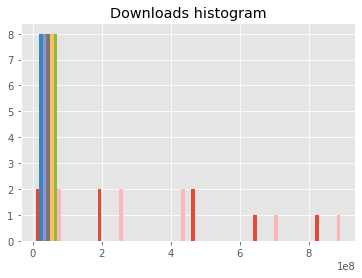

In [107]:
from matplotlib import pyplot as plt
x = dl.describe()
plt.hist(x)
plt.title('Downloads histogram')
plt.show()

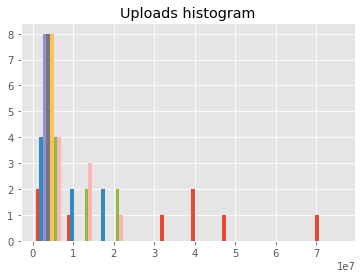

In [108]:
from matplotlib import pyplot as plt
x = du.describe()
plt.hist(x,bins=10)
plt.style.use('ggplot')
plt.title('Uploads histogram')
plt.show()

In [122]:
dll=dl[['Total DL (Bytes)','Youtube DL (Bytes)','Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)']]

In [125]:
dl

,Dur. (ms),Total DL (Bytes),Youtube DL (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes)
11,1970-01-01 00:00:00.000889834,535118044.0,2805710.0,829305.0,7241855.0,1541381.0,18094847.0,504604946.0
20,1970-01-01 00:00:00.000706649,422406937.0,15782415.0,3184530.0,10719953.0,141717.0,18625220.0,373953102.0
68,1970-01-01 00:00:00.000314961,93360974.0,22191188.0,2432521.0,3240592.0,726091.0,15879318.0,48891264.0
78,1970-01-01 00:00:00.000285833,193656366.0,14655680.0,2858041.0,4954251.0,1292760.0,5444485.0,164451149.0
84,1970-01-01 00:00:00.000259201,519351173.0,69288.0,1769010.0,7052986.0,2797274.0,10783199.0,496879416.0
...,...,...,...,...,...,...,...,...
149935,1970-01-01 00:00:00.000086399,432074290.0,6610042.0,3528163.0,3611580.0,3533781.0,18826490.0,395964234.0
149951,1970-01-01 00:00:00.000086399,132103771.0,267363.0,1224460.0,2234382.0,2664337.0,22890549.0,102822680.0
149968,1970-01-01 00:00:00.000085215,694842183.0,5116849.0,2544036.0,4791342.0,2556354.0,22559018.0,657274584.0
149973,1970-01-01 00:00:00.000086399,349067954.0,7347338.0,2393219.0,10154410.0,2413522.0,18726138.0,308033327.0


In [ ]:
import matplotlib.pyplot as plt 
dl.plot(x='Dur. (ms)', y='Youtube DL (Bytes)', kind='barh') 
plt.show()